In [2]:
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.formula.api
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import het_white , normal_ad

In [3]:
#read in the data from the csv file and create a dataframe called billet with the columns:m it is semi colon separated and the first row is the header
billet = pd.read_csv('billets.csv', sep=';', header=0)
copy = billet.copy()


In [4]:
#function to view the dtaframe stats and info about the dataframe
def view_dataframe_stats(df):
    print(df.shape)
    print(df.info())
    print(df.describe())
    return df
#use the function to view the dataframe stats and info
view_dataframe_stats(billet)

(1500, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB
None
          diagonal  height_left  height_right   margin_low    margin_up  \
count  1500.000000  1500.000000   1500.000000  1463.000000  1500.000000   
mean    171.958440   104.029533    103.920307     4.485967     3.151473   
std       0.305195     0.299462      0.325627     0.663813     0.231813   
min     171.040000   103.140000    102.820000     2.980000     2.270000   
25%     171.750000   103.820000    103.710000     4.015000     2.99

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


We have 6 dimensions besides the distingusihig column for distincting btw real and fake banknotes. The datatypes are ok. The only column with missing values  is the margin low column

#### Nous avons créé 2 nouveaux dataframes : un avec les colonnes qui ne sont pas manquantes et l'avons appelé Lin_Reg_Train_billet.
#### Le deuxième cadre de données a des colonnes qui sont manquantes et l'a appelé Lin_Reg_Test_billet.

In [5]:
# Function seperating the missing data from the missing data using linear regression
def train_data(df):
    #create a new dataframe with the columns that are not missing
    Lin_Reg_Train_billet = df.dropna() # this is the dataframe with the missing data removed
    
    # return the dataframes
    return Lin_Reg_Train_billet
#use the function to create a new dataframe with the columns that are not missing
Lin_Reg_Train_billet = train_data(billet)


In [6]:
# function to create X_train and y_train for the linear regression
def create_X_y(df):
    train_X = df.drop(['margin_low'], axis=1)
    train_y = df['margin_low']
    return train_X, train_y
#use the function to create X_train and y_train
train_X, train_y = create_X_y(Lin_Reg_Train_billet)

In [7]:
train_y

0       4.52
1       3.77
2       4.40
3       3.62
4       4.04
        ... 
1495    4.42
1496    5.27
1497    5.51
1498    5.17
1499    4.63
Name: margin_low, Length: 1463, dtype: float64

In [8]:
train_X

,is_genuine,diagonal,height_left,height_right,margin_up,length
0,True,171.81,104.86,104.95,2.89,112.83
1,True,171.46,103.36,103.66,2.99,113.09
2,True,172.69,104.48,103.50,2.94,113.16
3,True,171.36,103.91,103.94,3.01,113.51
4,True,171.73,104.28,103.46,3.48,112.54
...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,3.09,111.28
1496,False,172.19,104.63,104.44,3.37,110.97
1497,False,171.80,104.01,104.12,3.36,111.95
1498,False,172.06,104.28,104.06,3.46,112.25


In [9]:

regressor = LinearRegression()
regressor_lin = regressor.fit(train_X, train_y)
    
  


In [10]:
# function to carry out prediction on the test data
def prediction(regressor, train_X):
    #predict the test data
    train_X = Lin_Reg_Train_billet[['diagonal','length', 'margin_up', 'height_left', 'height_right', 'is_genuine']]
   
    #predict the test data
     #add a column TO PREDCIT MARGIN LOW FOR THE TEST DATA using the predict function
    Lin_Reg_Train_billet['margin_low_predict'] = regressor.predict(train_X)
    #return the test data
    return Lin_Reg_Train_billet

    

In [11]:
Lin_Reg_Train_billet = prediction(regressor, train_X)
Lin_Reg_Train_billet

<ipython-input-10-73876e53a482>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lin_Reg_Train_billet['margin_low_predict'] = regressor.predict(train_X)


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,margin_low_predict
0,True,171.81,104.86,104.95,4.52,2.89,112.83,-214.022838
1,True,171.46,103.36,103.66,3.77,2.99,113.09,-213.389740
2,True,172.69,104.48,103.50,4.40,2.94,113.16,-214.730985
3,True,171.36,103.91,103.94,3.62,3.01,113.51,-213.325465
4,True,171.73,104.28,103.46,4.04,3.48,112.54,-213.609501
...,...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28,-213.771508
1496,False,172.19,104.63,104.44,5.27,3.37,110.97,-214.312195
1497,False,171.80,104.01,104.12,5.51,3.36,111.95,-213.828875
1498,False,172.06,104.28,104.06,5.17,3.46,112.25,-214.106513


In [12]:
# fucntion to print the intercept and coefficient of the linear regression model
def print_coefficients(regressor_lin):
    #print the intercept
    print("Intercept: ", regressor_lin.intercept_)
    #print the coefficients
    print("Coefficients: ", regressor_lin.coef_)
    return regressor_lin
#use the function to print the intercept and coefficient of the linear regression model
regressor_lin = print_coefficients(regressor_lin)

Intercept:  2.8668228920543672
Coefficients:  [-1.14059676 -0.0130159   0.02829069  0.02674982 -0.21284432 -0.00388299]


In [13]:
# validating the model using smf.ols function
def validate_model(regressor_lin, X_train, y_train):
    #instantiate the model
    model = statsmodels.formula.api.ols(formula='margin_low ~ diagonal + length + margin_up + height_right + height_left',  data=billet) #instantiate the model
    #fit the model
    model_fit = model.fit()
    #print the summary
    print(model_fit.summary())
    #return the model
    return model_fit
#use the function to validate the model
model_fit = validate_model(regressor_lin, train_X, train_y)

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Thu, 19 May 2022   Prob (F-statistic):          2.60e-202
Time:                        10:52:16   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.9948      9.656      2.382   

### P(F-Stat): H0- de Fisher est que tous les coefficients sont nuls. Cela signifie que la signification du modèle général n'est pas la signification pour les paramètres.
### R-squared and adjusted R2 moins de 50% qui signifient la part de la variation totale de la variable dépendante qui est expliquée par la variation de la variable explanatory.
### Coeff : représentent la moyenne des variations de la variable réponse pour une variation d'une unité de la variable prédicteur tout en maintenant constantes les autres variables prédicteurs du modèle.

### Nous considérons n'importe quelle dimension pour le graphe. Cependant, dans ce cas, nous avons utilisé la diagonale puisqu'ils sont tous présents une fois dans chaque billet.

### Hypotheses testing for linear rgression

# 1. La normalité de la distribution des résidus
### Pour le test omnibus, H0: est que les résidus sont distribués selon une distribution normale. La valeur de Prob(Omnibus) doit être proche de 1. Pour nous, elle est nulle, donc l'hypothèse n'est pas vérifiée, les coefficients estimés ne seront pas BLEUS.
### La P(JBera) est redondante avec la Prob(Omnibus). Une valeur élevée pour la JBera montre que les résidus sont distribués selon une distribution normale.
### Pour éliminer le doute, nous avons effectué un test d'Aderson-Darling qui montre que les résidus sont conformes à une distribution normale.

In [14]:
#function to get mean of the residuals and the p-value of the residuals for the linear regression model
def get_residuals(model_fit):
    #get the residuals
    residuals = model_fit.resid
    residuals_mean = residuals.mean()
    #get the p-value of the residuals
    p_value = model_fit.pvalues[1]
    #return the residuals and the p-value
    return residuals_mean, p_value
#use the function to get mean of the residuals and the p-value of the residuals for the linear regression model
residuals_mean, p_value = get_residuals(model_fit)
residuals_mean, p_value

(5.119016018394707e-14, 0.007443858766982017)

moyenne résiduelle et la valeur p est égale à zéro. Par conséquent, nous pouvons confirmer que cet hypothèse est comme  valide.

# Multicolinearite
### L'hypothèse de multicollinéarité est que les prédicteurs utilisés dans la régression doivent être non corrélés entre eux. Pour nous, il semble qu'il y ait un problème de multicollinéarité. Le VIF montre en fait une grande multicollinéarité.
#### La caractéristique is_genuine est hors du cas pour le test de multicolinéarité car elle est qualitative.

In [15]:
# multicolinearity check using the variance inflation factor (VIF) method
def multicolinearity_check(model_fit):
    #get the VIF
    vif = pd.Series([variance_inflation_factor(Lin_Reg_Train_billet[['diagonal','length', 'margin_up', 'height_right', 'height_left']].values, i) for i in range(Lin_Reg_Train_billet[['diagonal','length', 'margin_up', 'height_right', 'height_left']].shape[1])], index=Lin_Reg_Train_billet[['diagonal','length', 'margin_up', 'height_right', 'height_left']].columns)
    #return the VIF
    return vif
#use the function to get the VIF per feature and print the VIF per feature and also the vif mean
vif = multicolinearity_check(model_fit)
# print the VIF per feature and also the vif mean
print('VIF per variable:' , vif)
print('average VIF:', vif.mean())

VIF per variable: diagonal        170566.670778
length           22708.222743
margin_up          261.969190
height_right    100858.864433
height_left     111895.309916
dtype: float64
average VIF: 81258.20741161003


#Linearity
### Par hypothèse, il existe une relation linéaire entre les variables explicatives et les variables dépendantes. non vérifiée dans notre cas car la relation semble non linéaire, les estimateurs semblent biaisés. Ils donnent un estimateur biaisé ou inefficace (avec variance non minimale) mais il y a des corrections possibles. la normalité des erreurs n'est pas obligatoire, mais la rend posiquante pour en tirer de bonnes propriétés.
# Balises possibles
# Transformation non linéaire sur les variables dépendantes/explicatives.
# Ajout de fonctionnalités non prises en compte auparavant

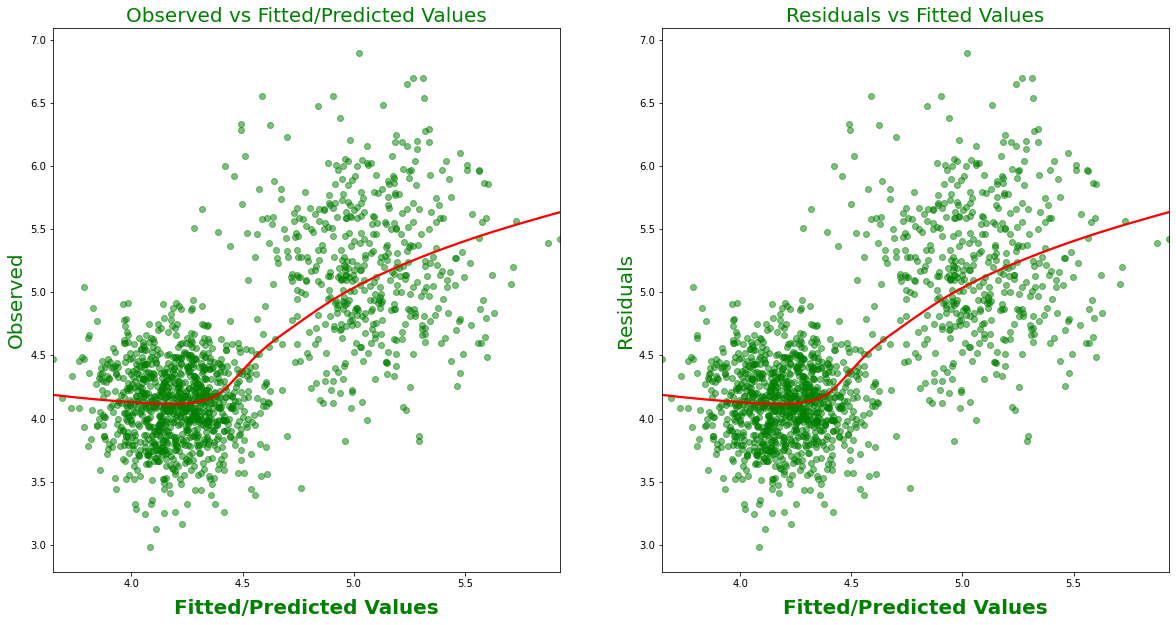

In [16]:
# Function for visual inspection of the assumption of linearity of the model
import matplotlib.pyplot as plt
import seaborn as sns
def linearity_visual_inspection(model, y):
    #get the residuals
    residuals = model.resid
    #get the p-value of the residuals
    #get the fitted values
    fitted_values = model.fittedvalues

    # use fig and ax to create a figure and axis
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    #plot the residuals
    sns.regplot(x=fitted_values, y=y, ax=ax[0], color='g', lowess=True, line_kws={'color':'r'}, scatter_kws={'alpha':0.5})
    #plot the residuals
    sns.regplot(x=fitted_values, y=y, ax=ax[1], color='g', lowess=True, line_kws={'color':'r'}, scatter_kws={'alpha':0.5})
    #set the title
    ax[0].set_title('Observed vs Fitted/Predicted Values', color='g', fontsize=20)
    #set the title
    ax[1].set_title('Residuals vs Fitted Values', color='g', fontsize=20)
    #set the xlabel
    ax[0].set_xlabel('Fitted/Predicted Values', color='g', fontsize=20, labelpad=10, rotation=0, fontweight='bold')
    #set the xlabel
    ax[1].set_xlabel('Fitted/Predicted Values', color='g', fontsize=20, labelpad=10, rotation=0, fontweight='bold')
    #set the ylabel
    ax[0].set_ylabel('Observed', color='g', fontsize=20)
    #set the ylabel
    ax[1].set_ylabel('Residuals', color='g', fontsize=20)
    #save the figure
    plt.savefig('visual_inspection.png')
    plt.show()
#use the function to create the visual inspection of the assumption of linearity of the model
linearity_visual_inspection(model_fit, Lin_Reg_Train_billet['margin_low'])

<ipython-input-17-d4ac432468c9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['residuals'] = df['margin_low'] - df['margin_low_predict']
/Users/badewaaderogba/opt/anaconda3/envs/azuredevop/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


the pvalue of the Aderson-Darling test is: 5.437018426487341e-21


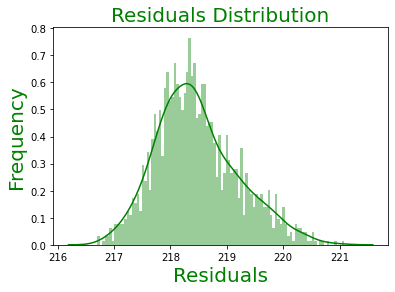

In [17]:
#A function to create a column with the residuals
def create_residuals(df):
    #create a new column with the residuals
    df['residuals'] = df['margin_low'] - df['margin_low_predict']

    #Normalize the residuals
    print('the pvalue of the Aderson-Darling test is:', normal_ad(df['residuals'])[1])
    #in graph the residuals
    sns.distplot(df['residuals'], bins=100, kde=True, color='g')
    #residuals on x axis and frequency on y axis
    plt.xlabel('Residuals', color='g', fontsize=20)
    plt.ylabel('Frequency', color='g', fontsize=20)
    plt.title('Residuals Distribution', color='g', fontsize=20)
    plt.savefig('residuals.png')
    plt.show()
#use the function to create a column with the residuals
create_residuals(Lin_Reg_Train_billet)

dans notre cas, l'hypothèse : p-value inférieure à alpha pour le test AD montre que l'hypothèse nulle de normalité de la distribution des résidus est rejetée. ceci n'est pas rejeté dans notre cas puisque la p-value obtenue est inférieure à la limite alpha de 5% (ou 1%), les résidus respectent une distribution normale.

### homoscedacity

## En cas d'homocédasticité, les variances des résidus doivent être inchangées. Les tests de Breusch-Pagan et de White permettent de tester l'hypothèse d'homoscédasticité du terme d'erreur d'un modèle de régression linéaire. Nous avons utilisé le test de White, un cas particulier de Breusch-Pagan puisque nous avons affaire à des distributions non normales et non linéaires.

In [18]:
# create homoscedascity function to check the homoscedascity of the model using white test and plot the p-value of the test and the p-value of the test with the null hypothesis of homoscedascity
def homoscedascity(model_fit):

    test_white = het_white(model_fit.resid, model_fit.model.exog)
    test_white_label = ['test-statistics',  'test-p-value', 'F-statistic', 'F-test p-value', 'test-statistic-p-value']
    #print the test-white and test-white with the null hypothesis of homoscedascity using dict zip format
    print(dict(zip(test_white_label, test_white)))

#use the function to check the homoscedascity of the model using white test and plot the p-value of the test and the p-value of the test with the null hypothesis of homoscedascity
homoscedascity(model_fit)

{'test-statistics': 109.86015196902085, 'test-p-value': 2.0828244986656082e-14, 'F-statistic': 5.85373120782196, 'F-test p-value': 4.9748650918950936e-15}


/Users/badewaaderogba/opt/anaconda3/envs/azuredevop/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


      margin_low  dfb_Intercept  dfb_diagonal  dfb_length  dfb_margin_up  \
0           4.52       0.038028      0.011150   -0.018016       0.028339   
1           3.77      -0.047734      0.031782    0.006096       0.006051   
2           4.40      -0.028752      0.034142   -0.001295      -0.010975   
3           3.62      -0.031981      0.060924   -0.029579       0.006425   
4           4.04      -0.025618      0.021411   -0.009670      -0.049448   
...          ...            ...           ...         ...            ...   
1495        4.42      -0.012867      0.024728    0.068023       0.058760   
1496        5.27       0.013954     -0.008838    0.011863       0.003147   
1497        5.51       0.014652     -0.013948   -0.012262       0.017806   
1498        5.17      -0.012639      0.007072    0.006439       0.023375   
1499        4.63      -0.015611      0.017445    0.002950      -0.008183   

      dfb_height_right  dfb_height_left   cooks_d  standard_resid  leverage  \
0       

,margin_low,dfb_Intercept,dfb_diagonal,dfb_length,dfb_margin_up,dfb_height_right,dfb_height_left,cooks_d,standard_resid,leverage,dffits_internal,student_resid,dffits
0,4.52,0.04,0.01,-0.02,0.03,-0.05,-0.04,0.0,-0.56,0.02,-0.07,-0.56,-0.07
1,3.77,-0.05,0.03,0.01,0.01,0.01,0.04,0.0,-0.77,0.01,-0.06,-0.77,-0.06
2,4.40,-0.03,0.03,-0.00,-0.01,-0.02,0.03,0.0,0.57,0.01,0.05,0.57,0.05
3,3.62,-0.03,0.06,-0.03,0.01,-0.02,0.00,0.0,-1.12,0.00,-0.07,-1.12,-0.07
4,4.04,-0.03,0.02,-0.01,-0.05,0.06,-0.03,0.0,-1.12,0.01,-0.08,-1.12,-0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,4.42,-0.01,0.02,0.07,0.06,-0.01,-0.04,0.0,-1.61,0.00,-0.11,-1.61,-0.11
1496,5.27,0.01,-0.01,0.01,0.00,-0.01,-0.01,0.0,-0.39,0.01,-0.03,-0.39,-0.03
1497,5.51,0.01,-0.01,-0.01,0.02,0.01,-0.01,0.0,1.27,0.00,0.05,1.27,0.05
1498,5.17,-0.01,0.01,0.01,0.02,0.00,0.01,0.0,0.75,0.00,0.04,0.75,0.04


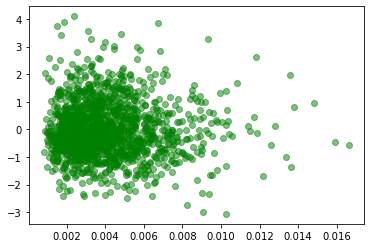

In [19]:
# The aim of this analysis is to identify individuals with a high degree of influence on the model.
def identification_of_atypical_and_influential_individuals(model_fit):
    resid_student = model_fit.get_influence().resid_studentized_external
    (cooks, p_val_cooks) = model_fit.get_influence().cooks_distance
    (dffits, p_val_dffits) = model_fit.get_influence().dffits
    leverage = model_fit.get_influence().hat_matrix_diag 

    sns.regplot(leverage, model_fit.resid_pearson, fit_reg=False, color='g', scatter_kws={'alpha':0.5}) # plot the leverage and the residuals


    #create a dataframe with the results of the analysis
    df_influence = pd.concat([Lin_Reg_Train_billet['margin_low'], model_fit.get_influence().summary_frame()], axis=1)
    #rename the columns
    df_influence = df_influence.rename(columns={'hat_diag':'leverage'})
    #print the dataframe
    print(df_influence)
    #save the dataframe
    df_influence.to_csv('df_influence.csv')
  #retrun the dataframe and round the values to 2 decimals
    return df_influence.round(2)
#use the function to create the dataframe with the results of the analysis
identification_of_atypical_and_influential_individuals(model_fit)

### distance d'influence.cook : utile pour l'estimation de l'influence d'une donnée lors de l'utilisation de LSM
### influence.hat_matrix_diag : La matrice de projection hat décrit l'explication de chaque valeur dépendante sur chaque valeur estimée. La diagonale correspond à l'effet de levier, qui explique l'influence de chaque valeur sur la même observation.
### influence.dffits statistiques de différence d'ajustement : est une méthode de diagnostic de l'influence d'un point dans une régression.
### influence.resid_studentized_external : est un résidu studentisé de manière externe, utilisé pour localiser les valeurs aberrantes, les observations avec des valeurs extrêmes sur le jeu de prédicteurs ou la variable dépendante.


/Users/badewaaderogba/opt/anaconda3/envs/azuredevop/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


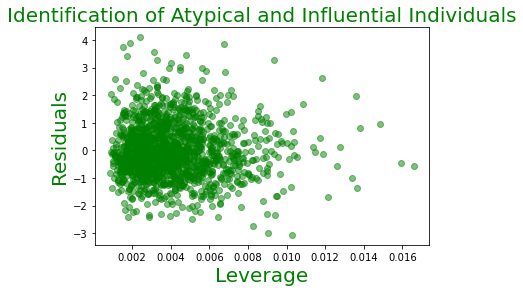

In [20]:
# function that graphically represent the results of the analysis
def identification_of_atypical_and_influential_individuals_graph(model_fit):
    resid_student = model_fit.get_influence().resid_studentized_external
    (cooks, p_val_cooks) = model_fit.get_influence().cooks_distance
    (dffits, p_val_dffits) = model_fit.get_influence().dffits
    leverage = model_fit.get_influence().hat_matrix_diag 

    sns.regplot(leverage, model_fit.resid_pearson, fit_reg=False, color='g', scatter_kws={'alpha':0.5})
    plt.title('Identification of Atypical and Influential Individuals', color='g', fontsize=20)
    plt.xlabel('Leverage', color='g', fontsize=20)
    plt.ylabel('Residuals', color='g', fontsize=20)
    plt.savefig('identification_of_atypical_and_influential_individuals.png')
    plt.show()
#use the function to create the graphical representation of the results of the analysis
identification_of_atypical_and_influential_individuals_graph(model_fit)

      margin_low  dfb_Intercept  dfb_diagonal  dfb_length  dfb_margin_up  \
0           4.52       0.038028      0.011150   -0.018016       0.028339   
1           3.77      -0.047734      0.031782    0.006096       0.006051   
2           4.40      -0.028752      0.034142   -0.001295      -0.010975   
3           3.62      -0.031981      0.060924   -0.029579       0.006425   
4           4.04      -0.025618      0.021411   -0.009670      -0.049448   
...          ...            ...           ...         ...            ...   
1495        4.42      -0.012867      0.024728    0.068023       0.058760   
1496        5.27       0.013954     -0.008838    0.011863       0.003147   
1497        5.51       0.014652     -0.013948   -0.012262       0.017806   
1498        5.17      -0.012639      0.007072    0.006439       0.023375   
1499        4.63      -0.015611      0.017445    0.002950      -0.008183   

      dfb_height_right  dfb_height_left   cooks_d  standard_resid  leverage  \
0       

/Users/badewaaderogba/opt/anaconda3/envs/azuredevop/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


      margin_low  dfb_Intercept  dfb_diagonal  dfb_length  dfb_margin_up  \
0           4.52       0.038028      0.011150   -0.018016       0.028339   
1           3.77      -0.047734      0.031782    0.006096       0.006051   
2           4.40      -0.028752      0.034142   -0.001295      -0.010975   
3           3.62      -0.031981      0.060924   -0.029579       0.006425   
4           4.04      -0.025618      0.021411   -0.009670      -0.049448   
...          ...            ...           ...         ...            ...   
1495        4.42      -0.012867      0.024728    0.068023       0.058760   
1496        5.27       0.013954     -0.008838    0.011863       0.003147   
1497        5.51       0.014652     -0.013948   -0.012262       0.017806   
1498        5.17      -0.012639      0.007072    0.006439       0.023375   
1499        4.63      -0.015611      0.017445    0.002950      -0.008183   

      dfb_height_right  dfb_height_left   cooks_d  standard_resid  leverage  \
0       

/Users/badewaaderogba/opt/anaconda3/envs/azuredevop/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


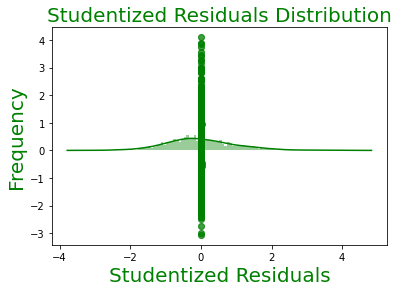

In [21]:
# Studentization of our residuals function
def studentization_of_our_residuals(model_fit):
    res_std = identification_of_atypical_and_influential_individuals (model_fit).student_resid
    res_std_df = pd.DataFrame(identification_of_atypical_and_influential_individuals (model_fit)['margin_low'][abs(res_std) > 2])
    #print the dataframe
    print(res_std_df.count())
    #graph the studentized residuals
    sns.distplot(res_std, bins=100, kde=True, color='g')
    #set the xlabel
    plt.xlabel('Studentized Residuals', color='g', fontsize=20)
    #set the ylabel
    plt.ylabel('Frequency', color='g', fontsize=20)
    #set the title
    plt.title('Studentized Residuals Distribution', color='g', fontsize=20)
    #save the figure
    plt.savefig('studentized_residuals.png')
    plt.show()
  
    
#use the function to create the graphical representation of the results of the analys
#use the function to graphically represent the results of the analysis
studentization_of_our_residuals(model_fit)


##  72 individus atypiques ont été localisés à l'aide de la formule (résidus studentisés > 2 en valeur absolue), Nous ne supprimons les points aberrants que s'ils sont influents. Les points à forte influence sont ceux qui dépassent le seuil (2*k) +2/n. k = nombre de déterminants et n = nombre d'observations de nos données.
### moyenne == 0, std == 1.001, min == -3.08, Q1 == -0.66, Q2: -0.09, Q3: 0.6, max == 4.12

/Users/badewaaderogba/opt/anaconda3/envs/azuredevop/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


      margin_low  dfb_Intercept  dfb_diagonal  dfb_length  dfb_margin_up  \
0           4.52       0.038028      0.011150   -0.018016       0.028339   
1           3.77      -0.047734      0.031782    0.006096       0.006051   
2           4.40      -0.028752      0.034142   -0.001295      -0.010975   
3           3.62      -0.031981      0.060924   -0.029579       0.006425   
4           4.04      -0.025618      0.021411   -0.009670      -0.049448   
...          ...            ...           ...         ...            ...   
1495        4.42      -0.012867      0.024728    0.068023       0.058760   
1496        5.27       0.013954     -0.008838    0.011863       0.003147   
1497        5.51       0.014652     -0.013948   -0.012262       0.017806   
1498        5.17      -0.012639      0.007072    0.006439       0.023375   
1499        4.63      -0.015611      0.017445    0.002950      -0.008183   

      dfb_height_right  dfb_height_left   cooks_d  standard_resid  leverage  \
0       

/Users/badewaaderogba/opt/anaconda3/envs/azuredevop/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


      margin_low  dfb_Intercept  dfb_diagonal  dfb_length  dfb_margin_up  \
0           4.52       0.038028      0.011150   -0.018016       0.028339   
1           3.77      -0.047734      0.031782    0.006096       0.006051   
2           4.40      -0.028752      0.034142   -0.001295      -0.010975   
3           3.62      -0.031981      0.060924   -0.029579       0.006425   
4           4.04      -0.025618      0.021411   -0.009670      -0.049448   
...          ...            ...           ...         ...            ...   
1495        4.42      -0.012867      0.024728    0.068023       0.058760   
1496        5.27       0.013954     -0.008838    0.011863       0.003147   
1497        5.51       0.014652     -0.013948   -0.012262       0.017806   
1498        5.17      -0.012639      0.007072    0.006439       0.023375   
1499        4.63      -0.015611      0.017445    0.002950      -0.008183   

      dfb_height_right  dfb_height_left   cooks_d  standard_resid  leverage  \
0       

/Users/badewaaderogba/opt/anaconda3/envs/azuredevop/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


      margin_low  dfb_Intercept  dfb_diagonal  dfb_length  dfb_margin_up  \
0           4.52       0.038028      0.011150   -0.018016       0.028339   
1           3.77      -0.047734      0.031782    0.006096       0.006051   
2           4.40      -0.028752      0.034142   -0.001295      -0.010975   
3           3.62      -0.031981      0.060924   -0.029579       0.006425   
4           4.04      -0.025618      0.021411   -0.009670      -0.049448   
...          ...            ...           ...         ...            ...   
1495        4.42      -0.012867      0.024728    0.068023       0.058760   
1496        5.27       0.013954     -0.008838    0.011863       0.003147   
1497        5.51       0.014652     -0.013948   -0.012262       0.017806   
1498        5.17      -0.012639      0.007072    0.006439       0.023375   
1499        4.63      -0.015611      0.017445    0.002950      -0.008183   

      dfb_height_right  dfb_height_left   cooks_d  standard_resid  leverage  \
0       

/Users/badewaaderogba/opt/anaconda3/envs/azuredevop/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


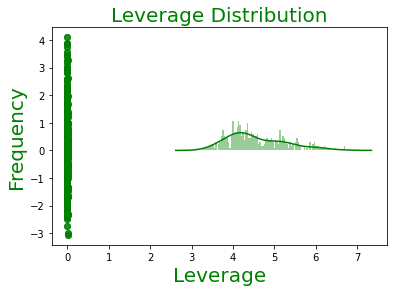

0       4.52
1       3.77
2       4.40
4       4.04
13      4.44
        ... 
1484    5.22
1485    5.16
1486    3.99
1487    4.88
1496    5.27
Name: margin_low, Length: 385, dtype: float64

In [22]:
# function to identify individuals with strong influence on the model
def identification_of_strong_influential_individuals(model_fit):
    k = 5
    n = len(billet.index)
    lin_leverage = ((2*k)+2)/n

    print(identification_of_atypical_and_influential_individuals (model_fit)['leverage'].describe())
    lev_hg = identification_of_atypical_and_influential_individuals (model_fit)['margin_low'][identification_of_atypical_and_influential_individuals (model_fit)['leverage'] > lin_leverage]
    print('number of individual influence', lev_hg.count())
    #graph the leverage
    sns.distplot(lev_hg, bins=100, kde=True, color='g')
    #set the xlabel
    plt.xlabel('Leverage', color='g', fontsize=20)
    #set the ylabel
    plt.ylabel('Frequency', color='g', fontsize=20)
    #set the title
    plt.title('Leverage Distribution', color='g', fontsize=20)
    #save the figure
    plt.savefig('leverage_distribution.png')
    plt.show()
    return lev_hg
#use the function to graphically represent the results of the analysis
identification_of_strong_influential_individuals(model_fit)





### Il y a 385 individus influents

/Users/badewaaderogba/opt/anaconda3/envs/azuredevop/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


      margin_low  dfb_Intercept  dfb_diagonal  dfb_length  dfb_margin_up  \
0           4.52       0.038028      0.011150   -0.018016       0.028339   
1           3.77      -0.047734      0.031782    0.006096       0.006051   
2           4.40      -0.028752      0.034142   -0.001295      -0.010975   
3           3.62      -0.031981      0.060924   -0.029579       0.006425   
4           4.04      -0.025618      0.021411   -0.009670      -0.049448   
...          ...            ...           ...         ...            ...   
1495        4.42      -0.012867      0.024728    0.068023       0.058760   
1496        5.27       0.013954     -0.008838    0.011863       0.003147   
1497        5.51       0.014652     -0.013948   -0.012262       0.017806   
1498        5.17      -0.012639      0.007072    0.006439       0.023375   
1499        4.63      -0.015611      0.017445    0.002950      -0.008183   

      dfb_height_right  dfb_height_left   cooks_d  standard_resid  leverage  \
0       

/Users/badewaaderogba/opt/anaconda3/envs/azuredevop/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


      margin_low  dfb_Intercept  dfb_diagonal  dfb_length  dfb_margin_up  \
0           4.52       0.038028      0.011150   -0.018016       0.028339   
1           3.77      -0.047734      0.031782    0.006096       0.006051   
2           4.40      -0.028752      0.034142   -0.001295      -0.010975   
3           3.62      -0.031981      0.060924   -0.029579       0.006425   
4           4.04      -0.025618      0.021411   -0.009670      -0.049448   
...          ...            ...           ...         ...            ...   
1495        4.42      -0.012867      0.024728    0.068023       0.058760   
1496        5.27       0.013954     -0.008838    0.011863       0.003147   
1497        5.51       0.014652     -0.013948   -0.012262       0.017806   
1498        5.17      -0.012639      0.007072    0.006439       0.023375   
1499        4.63      -0.015611      0.017445    0.002950      -0.008183   

      dfb_height_right  dfb_height_left   cooks_d  standard_resid  leverage  \
0       

/Users/badewaaderogba/opt/anaconda3/envs/azuredevop/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


      margin_low  dfb_Intercept  dfb_diagonal  dfb_length  dfb_margin_up  \
0           4.52       0.038028      0.011150   -0.018016       0.028339   
1           3.77      -0.047734      0.031782    0.006096       0.006051   
2           4.40      -0.028752      0.034142   -0.001295      -0.010975   
3           3.62      -0.031981      0.060924   -0.029579       0.006425   
4           4.04      -0.025618      0.021411   -0.009670      -0.049448   
...          ...            ...           ...         ...            ...   
1495        4.42      -0.012867      0.024728    0.068023       0.058760   
1496        5.27       0.013954     -0.008838    0.011863       0.003147   
1497        5.51       0.014652     -0.013948   -0.012262       0.017806   
1498        5.17      -0.012639      0.007072    0.006439       0.023375   
1499        4.63      -0.015611      0.017445    0.002950      -0.008183   

      dfb_height_right  dfb_height_left   cooks_d  standard_resid  leverage  \
0       

/Users/badewaaderogba/opt/anaconda3/envs/azuredevop/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


      margin_low  dfb_Intercept  dfb_diagonal  dfb_length  dfb_margin_up  \
0           4.52       0.038028      0.011150   -0.018016       0.028339   
1           3.77      -0.047734      0.031782    0.006096       0.006051   
2           4.40      -0.028752      0.034142   -0.001295      -0.010975   
3           3.62      -0.031981      0.060924   -0.029579       0.006425   
4           4.04      -0.025618      0.021411   -0.009670      -0.049448   
...          ...            ...           ...         ...            ...   
1495        4.42      -0.012867      0.024728    0.068023       0.058760   
1496        5.27       0.013954     -0.008838    0.011863       0.003147   
1497        5.51       0.014652     -0.013948   -0.012262       0.017806   
1498        5.17      -0.012639      0.007072    0.006439       0.023375   
1499        4.63      -0.015611      0.017445    0.002950      -0.008183   

      dfb_height_right  dfb_height_left   cooks_d  standard_resid  leverage  \
0       

/Users/badewaaderogba/opt/anaconda3/envs/azuredevop/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


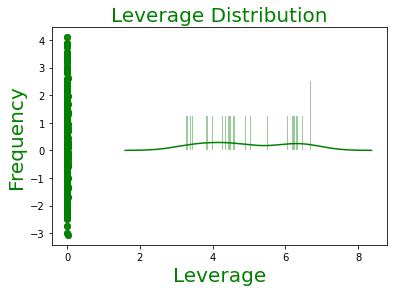

In [23]:
#function to identify individuals with a high degree of influence on the model
res_std = identification_of_atypical_and_influential_individuals (model_fit).student_resid
res_std_df = pd.DataFrame(identification_of_atypical_and_influential_individuals (model_fit)['margin_low'][abs(res_std) > 2])
k = 5
n = len(billet.index)
lin_leverage = ((2*k)+2)/n
lev_hg = identification_of_atypical_and_influential_individuals (model_fit)['margin_low'][identification_of_atypical_and_influential_individuals (model_fit)['leverage'] > lin_leverage]
lev_hg_outliers = pd.merge(lev_hg, res_std_df, right_index=True, left_index=True)
#print the dataframe
print(lev_hg_outliers.count())
print(lev_hg_outliers)
#graph the leverage
sns.distplot(lev_hg_outliers, bins=100, kde=True, color='g')
#set the xlabel
plt.xlabel('Leverage', color='g', fontsize=20)
#set the ylabel
plt.ylabel('Frequency', color='g', fontsize=20)
#set the title
plt.title('Leverage Distribution', color='g', fontsize=20)
#save the figure
plt.savefig('leverage_distribution_outliers.png')
plt.show()

    



### Il y a 385 individus influents. Nous avons 23 individus atypiques et influents dont l'impact sur la régression linéaire ne peut être sous-estimé.

# supprimer les individus pour relancer notre LR

In [24]:
# deletion of the influential individuals:

banknote_sans_influential_individuals = billet.drop(lev_hg_outliers.index)

reg_lin_cut = statsmodels.formula.api.ols('margin_low ~ diagonal + length + margin_up + height_right + height_left',  data=banknote_sans_influential_individuals)
model_fit1 = reg_lin_cut.fit()
#print the summary of the model
print(model_fit1.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     291.1
Date:                Thu, 19 May 2022   Prob (F-statistic):          3.43e-215
Time:                        10:53:38   Log-Likelihood:                -917.08
No. Observations:                1440   AIC:                             1846.
Df Residuals:                    1434   BIC:                             1878.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       24.2441      9.267      2.616   

# LOT OF CHANGES

## Frqmework App

In [25]:
def linear_regression_test(df):
    #create a new dataframe with the columns that are not missing
    Lin_Reg_Test_billet = df[df.isnull().any(axis=1)] # this is the dataframe with the missing values
    #return the dataframes
    return Lin_Reg_Test_billet
#use the function for application on the test data
Lin_Reg_Test_billet = linear_regression_test(billet)
test_x = Lin_Reg_Test_billet[['diagonal','length', 'margin_up', 'height_right', 'height_left', 'is_genuine']]
Lin_Reg_Test_billet['margin_low'] = regressor_lin.predict(test_x)

# join or concatenate the test data with the predicted data
output_reg = pd.concat([Lin_Reg_Test_billet, Lin_Reg_Train_billet])
output_reg = output_reg.drop(['margin_low_predict', 'residuals'], axis=1)
output_reg.info()
output_reg.head()
output_reg.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 72 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 83.5 KB


<ipython-input-25-3655a09a4e59>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lin_Reg_Test_billet['margin_low'] = regressor_lin.predict(test_x)


,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,-0.902539,3.151473,112.67850
std,0.305195,0.299462,0.325627,33.901295,0.231813,0.87273
min,171.040000,103.140000,102.820000,-214.831880,2.270000,109.49000
25%,171.750000,103.820000,103.710000,3.990000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.300000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.860000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


No more NA and there some changes at the global level, while the Q1 for margin low fell

DESCIRTIVE

In [26]:
# Distribution of true/false banknotes in our training dataset:
print(output_reg.groupby('is_genuine').size())


is_genuine
False     500
True     1000
dtype: int64


In [27]:
print(output_reg.groupby('is_genuine').count())

            diagonal  height_left  height_right  margin_low  margin_up  length
is_genuine                                                                    
False            500          500           500         500        500     500
True            1000         1000          1000        1000       1000    1000


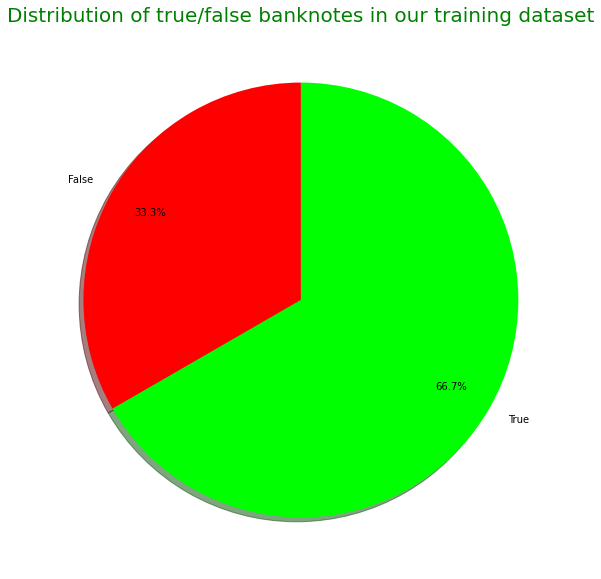

In [28]:
# Distribution of true/false banknotes in our training dataset using pie chart for learning:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.pie(output_reg.groupby('is_genuine').size(), labels=output_reg.groupby('is_genuine').size().index, autopct='%1.1f%%', startangle=90, pctdistance=0.8, shadow=True, colors=['#ff0000', '#00ff00'])
plt.title('Distribution of true/false banknotes in our training dataset', color='g', fontsize=20)
plt.savefig('distribution_of_true_false_banknotes_in_our_training_dataset.png')
plt.show()

In [29]:
# print Average banknotes by validity function for the training dataset:
def print_average_tickets_by_valid(df):
    #print the average tickets by authenticity
    print(df.groupby('is_genuine').mean())
#use the function to print the average tickets by authenticity for the training dataset
print_average_tickets_by_valid(output_reg.groupby('is_genuine').mean())

             diagonal  height_left  height_right  margin_low  margin_up  \
is_genuine                                                                
False       171.90116    104.19034     104.14362    1.709137    3.35016   
True        171.98708    103.94913     103.80865   -2.208377    3.05213   

               length  
is_genuine             
False       111.63064  
True        113.20243  


La forme générale de ces billets (vrais ou faux), n'est pas commune, elle est très proche du carré par rapport à nos billets habituels. Par exemple, en France, les mesures théoriques des billets varient de 120 à 160 mm en longueur et de 62 à 82 mm en hauteur. De plus, les diagonales sont imposantes.

/Users/badewaaderogba/opt/anaconda3/envs/azuredevop/lib/python3.8/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


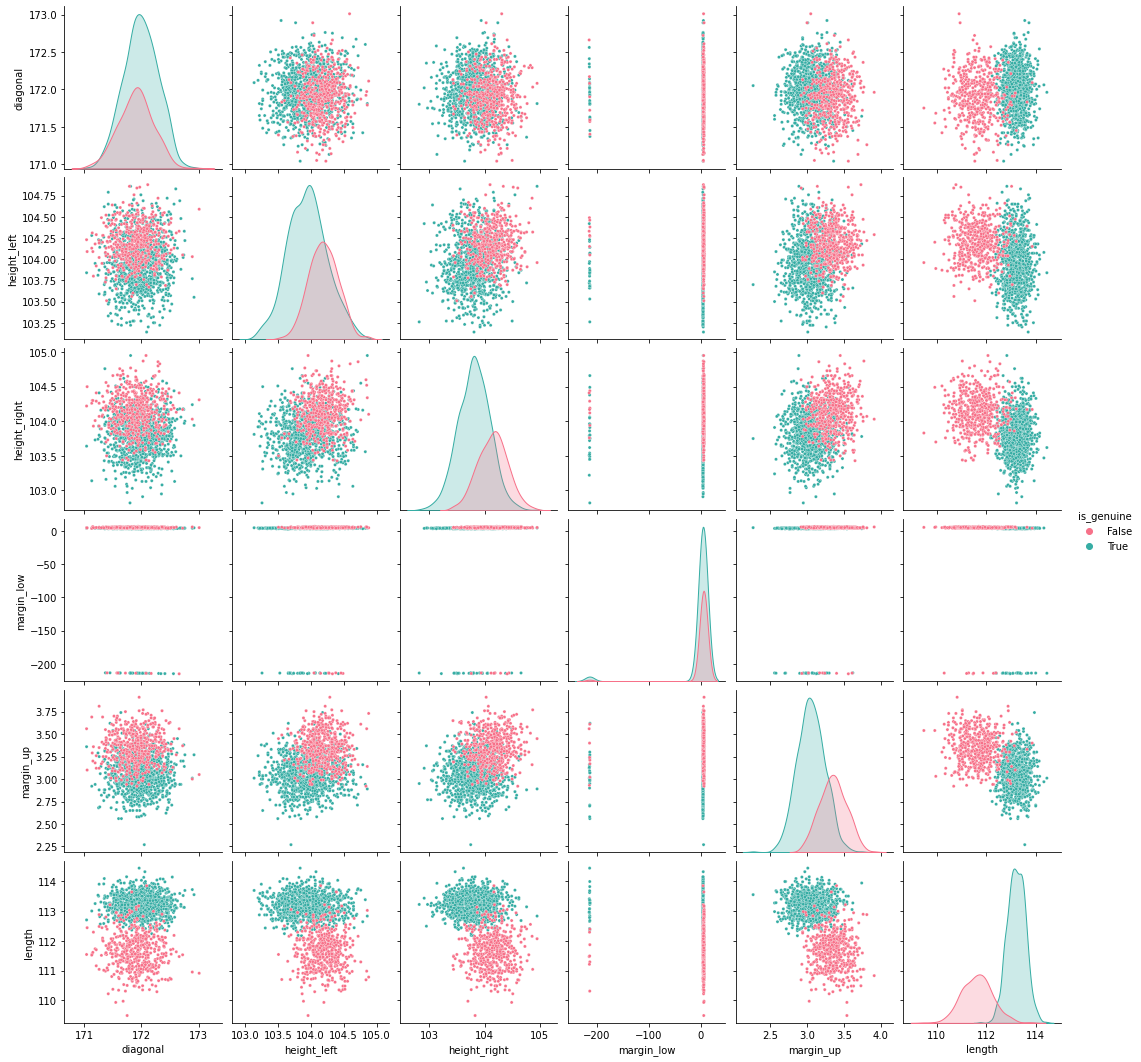

In [30]:
#function pairplot for the training dataset using seaborn library
import seaborn as sns
def pairplot_train(df):
    #create a pairplot
    sns.pairplot(df, hue='is_genuine', size=2.5, palette = 'husl', diag_kind='kde', plot_kws=dict(s=10, edgecolor="white"))
    #save the pairplot
    plt.savefig('pairplot_train.png')
    plt.show()
#use the function to create the pairplot for the training dataset
pairplot_train(output_reg)

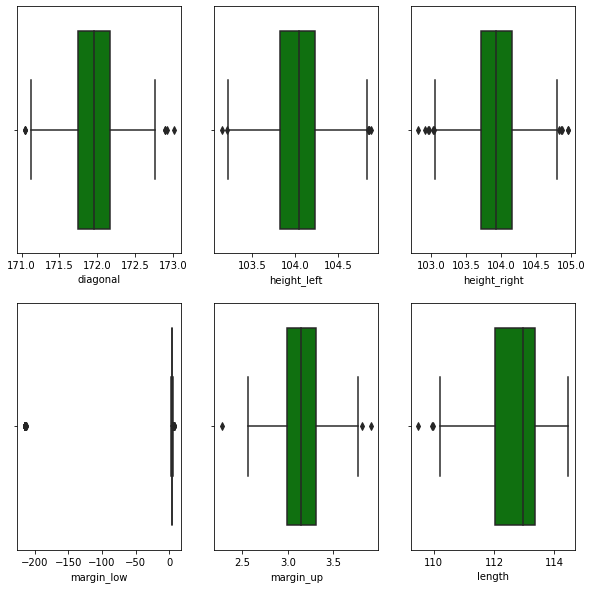

In [31]:
# outliers representation for the training dataset using seaborn library
def outliers_representation_train(df):
    x = 2
    y = 3
    z = 1

    fig = plt.figure(figsize=(10,10))
    for m in df.loc[:, df.columns != 'is_genuine']:
        plt.subplot(x, y, z)
        plt.xlabel(m, fontsize=10)
        sns.boxplot(x=df[m], color='g')
        z += 1
    plt.savefig('outliers_representation_train.png')
    plt.show()
#use the function to create the outliers representation for the training dataset
outliers_representation_train(output_reg)

In [32]:
# Mathematical identification fucntion of outliers for more accuracy
#function to identify outliers for the training dataset
def identify_outliers(df):
    Q1 = df.loc[:, df.columns != 'is_genuine'].quantile(0.25, interpolation='midpoint')
    Q3 = df.loc[:, df.columns != 'is_genuine'].quantile(0.75, interpolation='midpoint')
    
    inferiror_outlier_threshold = Q1-(1.5*(Q3-Q1))
    superior_outlier_threshold = Q3+(1.5*(Q3-Q1))
    #return the thresholds
    return inferiror_outlier_threshold, superior_outlier_threshold
#use the function to identify outliers for the training dataset
inferior_outlier_threshold, superior_outlier_threshold = identify_outliers(output_reg)
inferior_outlier_threshold, superior_outlier_threshold

(diagonal        171.120
 height_left     103.205
 height_right    103.050
 margin_low        2.685
 margin_up         2.510
 length          110.065
 dtype: float64,
 diagonal        172.800
 height_left     104.845
 height_right    104.810
 margin_low        6.165
 margin_up         3.790
 length          115.305
 dtype: float64)

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import decomposition

# Nombre de clusters souhaités
n_clust = 2

# import de l'échantillon
data = output_reg[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up','length']]

# préparation des données pour le clustering
X = data.values

# Réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité
# X_scaled = preprocessing.StandardScaler().fit_transform(X)

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

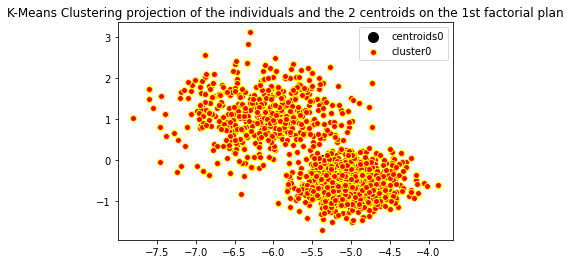

is_genuine  False  True
row_0                  
0             492   971
1               8    29


is_genuine,False,True
row_0,,
0,492,971
1,8,29


In [34]:
#k means clustering: (k-means clustering) function:
# The aim of this analysis is to identify individuals with a high degree of influence on the model.
#import kmeans clustering
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn.decomposition import PCA
def k_means_clustering(df):
    n_clusters = 2
    kmeans = KMeans(n_clusters=n_clusters)
    data = df[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up','length']]
    X = data.values
    fit_kmeans = kmeans.fit_transform(X)
    cluster_kmeans = kmeans.labels_

    kmeans_centroids = kmeans.cluster_centers_ 

    # Clustering by projection of individuals on the first factorial plane:
    kmeans_pca = decomposition.PCA(n_components=3).fit(X)
    cpa_kmeans = PCA(n_components=3).fit_transform(X)

    cent_kmeans_proj = kmeans_pca.transform(kmeans_centroids)

    # graphical representation of the results of the analysis with good colors usng plot scatter for the cluster
    for c, c_name in zip(['red', 'blue'], [0, 1]):
       
       
        # plot the centroids of the clusters , and the two clusters
        plt.scatter(cent_kmeans_proj[c_name, 0], cent_kmeans_proj[c_name, 1], c='black', s=100, label='centroids{}'.format(c_name))
       
    
       
        # plot only the zero cluster (cluster 0)
                        #plot scatter for cluster 1
        plt.scatter(cpa_kmeans[kmeans.labels_ == c_name, 0], cpa_kmeans[kmeans.labels_ == c_name, 1], c=c, edgecolors='yellow', label="cluster{}".format(c_name))
        # plot cluster 1
        
        plt.legend()
    
        plt.title('K-Means Clustering projection of the individuals and the {} centroids on the 1st factorial plan'.format(len(kmeans_centroids)))
        plt.show()
   
   #verification of the calssification of the individuals: confusion matrix
        kmeans_matrix = pd.crosstab(cluster_kmeans, df['is_genuine'])
        print(kmeans_matrix)
    #save the dataframe
        kmeans_matrix.to_csv('kmeans_matrix.csv')
    #return the dataframe
        return kmeans_matrix
#use the function to create the dataframe with the results of the analysis
k_means_clustering(output_reg)


    

### LOGISTIC REGRESSION

## Nous effectuons une régression logistique en cherchant à construire un modèle prédictif à partir de données annotées. La tâche consiste à expliquer (Vrai/Faux) une variable qualitative binaire par des variables aléatoires quantitatives (en mm). Nous avons commencé par isoler la variable dépendante des autres.

Nous inspectons le contenu des données.
Nous avons isolé la variable cible et les variables explicatives potentielles dans deux structures distinctes.
Nous comptons également les effectifs par classe. 

In [35]:
# function to create the dataframe with the results of the analysis
import statsmodels.api
def results(df):
    y = df.loc[:, df.columns == 'is_genuine']
    X = df.loc[:, df.columns != 'is_genuine']
    X = statsmodels.api.tools.add_constant(X)
    print(X.tail(5))
    print(y.value_counts())
    print(y.value_counts()/len(y))
    #return the dataframe
    return X, y
#use the function to create the dataframe with the results of the analysis
X, y = results(output_reg)

      const  diagonal  height_left  height_right  margin_low  margin_up  \
1495    1.0    171.75       104.38        104.17        4.42       3.09   
1496    1.0    172.19       104.63        104.44        5.27       3.37   
1497    1.0    171.80       104.01        104.12        5.51       3.36   
1498    1.0    172.06       104.28        104.06        5.17       3.46   
1499    1.0    171.47       104.15        103.82        4.63       3.37   

      length  
1495  111.28  
1496  110.97  
1497  111.95  
1498  112.25  
1499  112.07  
is_genuine
True          1000
False          500
dtype: int64
is_genuine
True          0.666667
False         0.333333
dtype: float64


/Users/badewaaderogba/opt/anaconda3/envs/azuredevop/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Le code ci-dessous effectue une répartition train-test qui place 70 % des données dans un ensemble d'apprentissage et 30 % des données dans un ensemble de test. Cela permet de s'assurer que notre algorithme de classification est capable de bien se généraliser à de nouvelles données.

In [36]:
#function to split the dataframe into training and test sets
def split_data(X, y):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    return X_train, X_test, y_train, y_test
#use the function to split the dataframe into training and test sets
X_train, X_test, y_train, y_test = split_data(X, y)

Nous exécutons la régression. Après avoir appelé le constructeur de la classe Logit() dans lequel
nous avons passé les données, nous appelons la fonction fit() qui génère un objet résultat avec des propriétés et des méthodes qui seront très utiles plus tard.


 Par défaut, l’outil s’appuie sur l’algorithme de Newton-Raphson 

 11 iterations were necessary to maximize the log likelihood

 L'avertissement est dû au fait que le modèle apprend "trop bien", il y a des variables qui prédisent parfaitement y, ce n'est pas réaliste, cela vient du fait que nos données sont très artificielles, donc il y a peu d'erreur.

Il y a des variables x non significatives au seuil alpha de 5% (si on prend alpha 1%, on va enlever height_right aussi), on recommence la régression sans ces variables (diagonale, height_left, height_right).



In [37]:
# regression logistic function on training set
from statsmodels.api import Logit
def logistic_regression(X, y):
    
    logit_model = Logit(endog = y, exog = X)
    logit_results = logit_model.fit()
    print(logit_results.summary())
    #return the dataframe
    return logit_results
#use the function to create the dataframe with the results of the analysis
logit_results = logistic_regression(X_train, y_train)


Optimization terminated successfully.
         Current function value: 0.065256
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1050
Model:                          Logit   Df Residuals:                     1043
Method:                           MLE   Df Model:                            6
Date:                Thu, 19 May 2022   Pseudo R-squ.:                  0.8966
Time:                        10:54:01   Log-Likelihood:                -68.518
converged:                       True   LL-Null:                       -662.66
Covariance Type:            nonrobust   LLR p-value:                1.648e-253
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -210.7825    186.206     -1.132      0.258    -575.740     154.175
diagonal         1.142

Nous affichons ensuite les propriétés de l’objet produit par fit().

In [38]:
#propriétés de l'objet résultat
print(dir(logit_results))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_data_attr', '_data_in_cache', '_get_endog_name', '_get_robustcov_results', '_use_t', 'aic', 'bic', 'bse', 'conf_int', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'f_test', 'fittedvalues', 'get_margeff', 'initialize', 'k_constant', 'llf', 'llnull', 'llr', 'llr_pvalue', 'load', 'mle_retvals', 'mle_settings', 'model', 'nobs', 'normalized_cov_params', 'params', 'pred_table', 'predict', 'prsquared', 'pvalues', 'remove_data', 'resid_dev', 'resid_generalized', 'resid_pearson', 'resid_response', 'save', 'scale', 'set_null_options', 'summary', 'summary2', 't_test', 't_test_pairwise', 'tvalues', 'use_t', 'wald_t

In [39]:
#90% confidence interval of the coefficients
print(logit_results.conf_int(alpha=0.1))


                       0          1
const        -517.064467  95.499502
diagonal       -0.143336   2.427574
height_left    -3.681130  -0.967873
height_right   -5.802798  -2.736282
margin_low     -0.019184   0.009345
margin_up     -11.538652  -6.624968
length          5.251776   7.712810


In [40]:
#valeurs estimées par la régression en resubstitution

print(logit_results.fittedvalues)

494      7.968729
1024    -5.823687
533     12.006415
619      7.676317
628      8.169985
          ...    
745      9.321716
819      4.497796
1211    -7.504940
535      3.163755
662     13.037063
Length: 1050, dtype: float64


In [41]:
#Voici les coefficients estimés
print(logit_results.params)

const          -210.782483
diagonal          1.142119
height_left      -2.324501
height_right     -4.269540
margin_low       -0.004919
margin_up        -9.081810
length            6.482293
dtype: float64


# H testing

In [42]:
# function to print the unique values of a column in a dataframe to test the binary classification
def unique_values(df, column):
    print(df[column].unique())
    #return the dataframe
    return df[column].nunique()
#use the function to create the dataframe with the results of the analysis
unique_values(output_reg, 'is_genuine')

[ True False]


2

In [43]:
X = output_reg[['margin_low', 'margin_up', 'length', 'height_right']]
X = statsmodels.api.tools.add_constant(X)
from statsmodels.api import Logit
    #restarting te logistic regression model
logit_model = Logit(endog = y, exog = X)
logit_results = logit_model.fit()


Optimization terminated successfully.
         Current function value: 0.074290
         Iterations 11


/Users/badewaaderogba/opt/anaconda3/envs/azuredevop/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [44]:
# Test de Wald:
import statsmodels.formula.api as smf
print("After the elimination of insignificant features:\n", logit_results.wald_test_terms())

After the elimination of insignificant features:
                     chi2        P>chi2  df constraint
const           7.024586  8.039806e-03              1
margin_low      3.434421  6.385096e-02              1
margin_up      54.748182  1.370059e-13              1
length        130.700894  2.878729e-30              1
height_right   37.921213  7.365996e-10              1


In [45]:
output_reg

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,-213.972513,3.25,112.79
99,True,171.93,104.07,104.18,-213.986778,3.14,113.08
151,True,172.07,103.80,104.38,-214.085086,3.02,112.93
197,True,171.45,103.66,103.80,-213.351084,3.62,113.27
241,True,171.83,104.14,104.06,-213.884851,3.02,112.36
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.420000,3.09,111.28
1496,False,172.19,104.63,104.44,5.270000,3.37,110.97
1497,False,171.80,104.01,104.12,5.510000,3.36,111.95
1498,False,172.06,104.28,104.06,5.170000,3.46,112.25


In [46]:
# solve multicolnearity problem: Aucune des variables n'a un VIF supérieur à cinq. Il n'y a aucune colinéarité
fiv = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

print (fiv)
print(fiv.mean())




    

const           182901.412537
margin_low           1.003041
margin_up            1.395273
length               1.505344
height_right         1.211593
dtype: float64
36581.305557697


MODEL APPLI

In [47]:
output_reg

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,-213.972513,3.25,112.79
99,True,171.93,104.07,104.18,-213.986778,3.14,113.08
151,True,172.07,103.80,104.38,-214.085086,3.02,112.93
197,True,171.45,103.66,103.80,-213.351084,3.62,113.27
241,True,171.83,104.14,104.06,-213.884851,3.02,112.36
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.420000,3.09,111.28
1496,False,172.19,104.63,104.44,5.270000,3.37,110.97
1497,False,171.80,104.01,104.12,5.510000,3.36,111.95
1498,False,172.06,104.28,104.06,5.170000,3.46,112.25


In [48]:
X_train['proba'] = logit_results.predict(X)
X_train['y_pred'] = (logit_results.predict(X) >= 0.5).astype(int)
X_train

,const,diagonal,height_left,height_right,margin_low,margin_up,length,proba,y_pred
494,1.0,172.08,104.19,104.03,4.11,2.99,113.50,0.999589,1
1024,1.0,171.52,104.05,104.31,4.24,3.70,112.60,0.007298,0
533,1.0,172.33,103.73,103.80,3.77,2.86,113.58,0.999969,1
619,1.0,172.26,104.06,103.99,4.03,2.84,113.14,0.999029,1
628,1.0,171.44,103.52,103.49,4.09,3.12,113.23,0.999411,1
...,...,...,...,...,...,...,...,...,...
745,1.0,172.16,103.92,103.76,4.35,2.84,113.21,0.999774,1
819,1.0,172.20,104.01,103.74,4.06,3.17,112.94,0.983582,1
1211,1.0,172.31,103.98,104.09,5.28,3.47,111.71,0.000469,0
535,1.0,171.68,104.18,103.89,4.40,3.33,113.21,0.978407,1


Model evaluation

percentage of true positives: 94.0952380952381
percentage of false positives: 2.2857142857142856
percentage of false negatives: 1.1428571428571428
percentage of true negatives: 45.333333333333336
percentage: [[45.33333333  2.28571429]
 [ 1.14285714 94.0952381 ]]


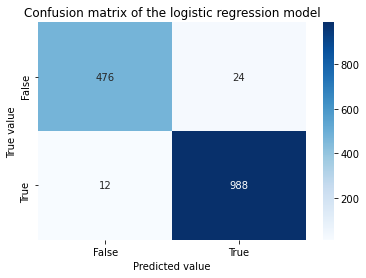

In [49]:
cf = logit_results.pred_table()
percent = (cf * 100).round(2)/len(X_train)
print('percentage of true positives:', percent[1][1])
print('percentage of false positives:', percent[0][1])
print('percentage of false negatives:', percent[1][0])
print('percentage of true negatives:', percent[0][0])
print('percentage:', percent)

#graph
import matplotlib.pyplot as plt
sns.heatmap(cf, fmt='g', annot=True, cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.title('Confusion matrix of the logistic regression model')
plt.ylabel('True value')
plt.xlabel('Predicted value')
plt.show()


Notre modèle est quasi idéal puisque tous les scores sont proches de 1. Ce n'est pas très réel, mais cela montre qu'il est pragmatique.
Accuracy: le ratio de prédictions correctes. Une bonne mesure si l'ensemble de données est symétrique et si FP et FN ont la même importance/poids. Précision = TP+TN/total
Précision : (spécificité) rapport des prédictions TP sur TP. Précision = TP/TP+FP
Recall : (sensibilité) - Rapport des positifs correctement prédits parmi tous les positifs. Rappel = TP/TP+FN
Notre modèle est quasi idéal puisque tous les scores sont proches de 1. Ce n'est pas très réel, mais cela montre qu'il est pragmatique.


Score F1= le taux de reconnaissance - Moyenne pondérée de la sensibilité et de la spécificité. FP et FN sont pris en compte. Ce score, bien que moins intuitif que la précision, est plus précis, notamment pour les ensembles de données asymétriques. Score F1 = 2(Rappel Précision) / (Rappel + Précision)



In [50]:
from sklearn.metrics import roc_auc_score , roc_curve, accuracy_score , precision_score, recall_score
print("Precision:", accuracy_score(y_train, X_train['y_pred']))
print('score f1:', recall_score(y_train, X_train['y_pred']))
print('specificity:', precision_score(y_train, X_train['y_pred']))
print('sensitivity:', recall_score(y_train, X_train['y_pred']))


Precision: 0.98
score f1: 0.9943502824858758
specificity: 0.9764216366158114
sensitivity: 0.9943502824858758


In [51]:
# get the coefficients and intercept of the model
coef = logit_results.params
print(coef)


const          -219.188255
margin_low       -0.009581
margin_up        -8.171976
length            6.290341
height_right     -4.445787
dtype: float64


In [52]:
# Odds Ratios: # Il est utile de parler en mots de risque
print("The odds ratio are:\n", np.exp(logit_results.params)) 


The odds ratio are:
 const           6.423181e-96
margin_low      9.904647e-01
margin_up       2.824594e-04
length          5.393371e+02
height_right    1.172787e-02
dtype: float64


Text(0.5, 0, 'False positive rate')

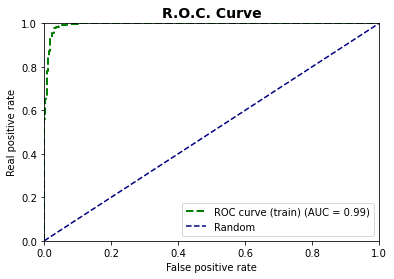

In [53]:
# Courbe R.O.C.:
fprm, tprm, _ = roc_curve(y_train, X_train['proba'])
roc_auc = roc_auc_score(y_train, X_train['proba'])

# Graphique:
plt.title("R.O.C. Curve", fontsize=14, fontweight='bold')
plt.plot(fprm,
        tprm,
        color="green",
        linewidth=2, label = "ROC curve (train) (AUC = %0.2f)" % roc_auc, linestyle='--',  markerfacecolor='blue', markeredgecolor='black')
        
plt.plot([0, 1], [0, 1],color="navy", label = "Random", linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc = "lower right")
plt.ylabel("Real positive rate")
plt.xlabel("False positive rate")

on obtient un modèle presque parfait dont l'aire sous la courbe est proche de 1.

In [54]:
X_test

,const,diagonal,height_left,height_right,margin_low,margin_up,length
444,1.0,172.23,103.94,103.46,3.950000,3.15,113.77
413,1.0,172.30,103.66,103.50,-214.337465,3.16,112.95
1499,1.0,171.47,104.15,103.82,4.630000,3.37,112.07
17,1.0,171.88,104.47,103.45,4.560000,3.33,113.01
1409,1.0,171.90,104.09,104.73,4.590000,3.27,112.47
...,...,...,...,...,...,...,...
1328,1.0,172.10,104.22,103.99,5.260000,3.24,111.94
1197,1.0,171.94,104.20,103.65,5.000000,3.43,112.08
1320,1.0,172.05,104.60,104.32,5.120000,3.35,111.78
1158,1.0,172.11,104.10,104.18,4.520000,3.21,111.45


Model application using the test data

In [55]:
X_test = X_test[['margin_low', 'margin_up', 'length', 'height_right']]
X_test = statsmodels.api.tools.add_constant(X_test)
X_test['proba'] = logit_results.predict(X_test)
X_test['y_pred'] = (X_test['proba'] >= 0.5).astype(int)
print(X_test[['proba', 'y_pred']])
print('\nline identification:')
for i, k in zip( X_test['y_pred'], X_test.index):
    if i == 1:
        print('the banknote', '{}'.format(k), 'is a genuine banknote')
    else:
        print('the banknote', '{}'.format(k), 'is a counterfeit banknote')



/Users/badewaaderogba/opt/anaconda3/envs/azuredevop/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


         proba  y_pred
444   0.999978       1
413   0.999387       1
1499  0.033076       0
17    0.989122       1
1409  0.016508       0
...        ...     ...
1328  0.019986       0
1197  0.045197       0
1320  0.000700       0
1158  0.000517       0
927   0.994325       1

[450 rows x 2 columns]

line identification:
the banknote 444 is a genuine banknote
the banknote 413 is a genuine banknote
the banknote 1499 is a counterfeit banknote
the banknote 17 is a genuine banknote
the banknote 1409 is a counterfeit banknote
the banknote 1151 is a counterfeit banknote
the banknote 717 is a genuine banknote
the banknote 140 is a genuine banknote
the banknote 227 is a genuine banknote
the banknote 1415 is a counterfeit banknote
the banknote 1368 is a counterfeit banknote
the banknote 1251 is a counterfeit banknote
the banknote 1343 is a counterfeit banknote
the banknote 153 is a genuine banknote
the banknote 699 is a genuine banknote
the banknote 651 is a genuine banknote
the banknote 1304 is

Text(0.5, 0, 'False positive rate')

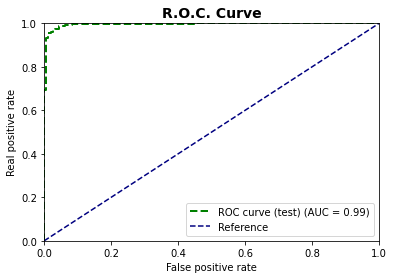

In [56]:
#tes roc
import numpy
fprm, tprm, _ = roc_curve(y_test, X_test['proba'], pos_label=1)
roc_auc = roc_auc_score(y_test, X_test['proba'])

# Graphique:
plt.title("R.O.C. Curve", fontsize=14, fontweight='bold')
plt.plot(fprm,
        tprm,
        color="green",
        linewidth=2, label = "ROC curve (test) (AUC = %0.2f)" % roc_auc, linestyle='--',  markerfacecolor='blue', markeredgecolor='black')
        
plt.plot([0, 1], [0, 1],color="navy", label = "Reference", linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc = "lower right")
plt.ylabel("Real positive rate")
plt.xlabel("False positive rate")


on obtient un modèle presque parfait dont l'aire sous la courbe est proche de 1.

percentage of true positives: 219.55555555555554
percentage of false positives: 5.333333333333333
percentage of false negatives: 2.6666666666666665
percentage of true negatives: 105.77777777777777
percentage: [[105.77777778   5.33333333]
 [  2.66666667 219.55555556]]


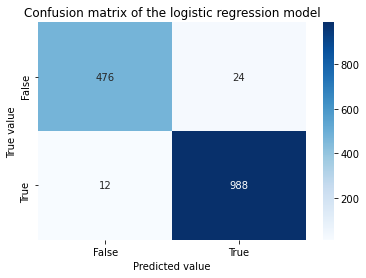

In [59]:
# get the confusion matrix of the model for the test set
import pandas as pd
cf1 = logit_results.pred_table()
percent = (cf * 100).round(2)/len(X_test)
print('percentage of true positives:', percent[1][1])
print('percentage of false positives:', percent[0][1])
print('percentage of false negatives:', percent[1][0])
print('percentage of true negatives:', percent[0][0])
print('percentage:', percent)

#graph
import matplotlib.pyplot as plt
sns.heatmap(cf1, fmt='g', annot=True, cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.title('Confusion matrix of the logistic regression model')
plt.ylabel('True value')
plt.xlabel('Predicted value')
plt.show()


In [58]:
#quality reports for the model prediction on the test set
print("Precision:", accuracy_score(y_test, X_test['y_pred']))
print('score f1:', recall_score(y_test, X_test['y_pred']))
print('specificity:', precision_score(y_test, X_test['y_pred']))
print('sensitivity:', recall_score(y_test, X_test['y_pred']))


Precision: 0.9666666666666667
score f1: 0.9726027397260274
specificity: 0.9759450171821306
sensitivity: 0.9726027397260274
